<a href="https://colab.research.google.com/github/paulgureghian/Celsius_to_Fahrenheit/blob/master/Celsius_to_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Created by Paul A. Gureghian in Mar 2019.** 

**This notebook contains a Deep Learning model in TensorFlow and Keras.**

**Its purpose is to convert Celsius to Fahrenheit using this formula:**

              f = c * 1.8 + 32

**I will train the model on sample Celsius and Fahrenheit values.**

**The goal is to tweak the model / training hyperparams to the point of the model figuring out the above formula.**


## Import packages

And have TF only display errors.





In [0]:
### Import packages
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

## Set up training data

Supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs. Since the task in this notebook is to create a model that can give the temperature in Fahrenheit when given the degrees in Celsius, I will create two lists `celsius_q` and `fahrenheit_a` that I can use to train my model.

In [40]:
### Create two lists
celsius_q = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


## Create the model

Now I will create the model. I will use the simplest possible model I can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron. 

### Build a layer

I'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)


In [0]:
### Build the model layer
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])  

### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [42]:
### Define the model
model = tf.keras.Sequential([l0])

print("Model: ", model)

Model:  <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff45a653438>


## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.


In [43]:
### Compile the model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

print("Model: ", model) 

Model:  <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff45a653438>


## Train the model

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are intially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted. 

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [44]:
### Train the model
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

print("Finished training the model")

Finished training the model


## Display training statistics

The `fit` method returns a history object. I can use this object to plot how the loss of my model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`. 

I'll use 'Matplotlib' to visualize this . As you can see, my model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

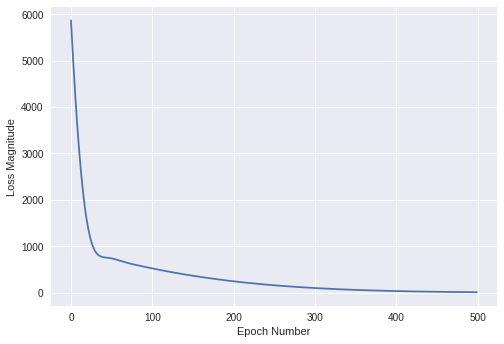

In [45]:
### Visualize the loss over the epochs
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values

Now that I have a model that has been trained to learn the relationship between `celsius_q` and `fahrenheit_a`. I can use the predict method to have it calculate the Fahrenheit degree for a previously unknown Celsius degree. 

In [46]:
### Get model predicions 
print(model.predict([100.0]))

[[211.2948]]


The correct answer is $100 \times 1.8 + 32 = 212$, so my model is doing really well.

### To review


*   I created a model with a Dense layer
*   I trained it with 3500 examples (7 pairs, over 500 epochs).

The model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of the training data.)




## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer. 

In [47]:
### Print the weights
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8263732]], dtype=float32), array([28.657463], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. 

This is really close to the values in the conversion formula. 

In [48]:
### Add more layers and nodes to the model
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  

model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

print("Finished training the model: ", '\n')

print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit.".format(model.predict([100.0])))

print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model:  

[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit.
These are the l0 variables: [array([[-0.23374876, -0.11311455,  0.5360384 , -0.11421468]],
      dtype=float32), array([-3.2842505, -1.0320085,  3.4192286,  3.0376196], dtype=float32)]
These are the l1 variables: [array([[ 0.27908605, -0.6084972 , -0.74578243, -0.23570512],
       [-0.5034305 , -0.17023431,  0.07804974,  0.33429882],
       [ 1.0468805 ,  0.8450096 ,  0.98596704,  0.40965956],
       [ 0.2968336 ,  0.6441581 ,  0.18454526, -0.41086185]],
      dtype=float32), array([3.130781 , 3.4650824, 3.5085223, 3.3365965], dtype=float32)]
These are the l2 variables: [array([[1.0429417],
       [1.0874474],
       [0.7837027],
       [0.4972928]], dtype=float32), array([3.3896282], dtype=float32)]


As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the `l0` and `l1` layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.